# 1D Non-Linear Convection

Solves by FDM (forward in time, backward in space):

$$ \frac{ \partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 $$

Initial Condition
$$ u_0(x)=   \left\{
\begin{array}{ll}
      1 & 0 \leq x<0.5 \\
      2 & 0.5 \leq x \leq 1 \\
      1 & 1 < x \leq 2
\end{array} 
\right.  $$

Boundary Condition: $u(0,t) = 1$


In [93]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

x_start, x_end = 0, 2  # domain limits
nodes_x = 41           # number of nodes
dx = (x_end - x_start)/(nodes_x - 1) # spatial grid resolution

steps_t = 10   # number of time-steps
dt = 0.025     # time step size

# generate grid
x = np.linspace(x_start, x_end, nodes_x)

# initialize solution at time step n and n+1
u0 = np.ones(nodes_x)
u1 = np.ones(nodes_x)
u2 = np.ones(nodes_x)

# set initial condition
u0[int(0.5/dx) : int(1/dx)] = 2

# solve finite difference equations
u1 = u0
for n in range(steps_t):
    u2[1:] = u1[1:] - u1[1:] * (dt/dx) * (u1[1:] - u1[0:-1])
    u1 = u2

Text(0.5, 0, 'x')

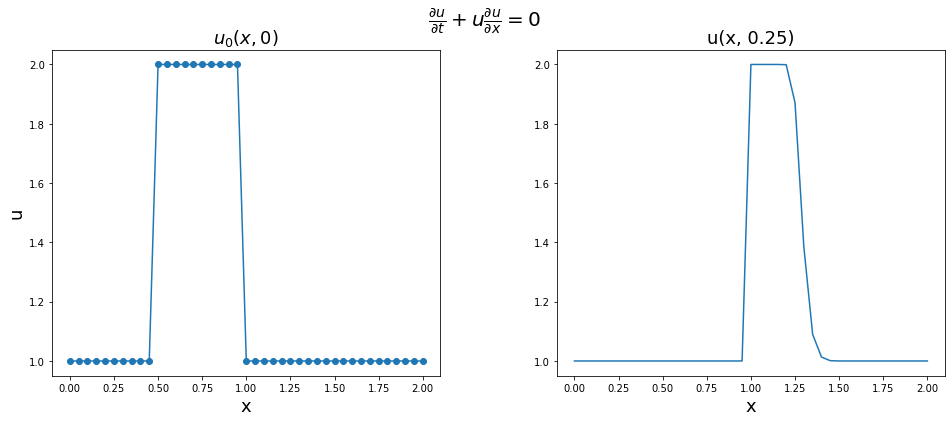

In [95]:
# plot results
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle("$\\frac{ \partial u}{\partial t} + u \\frac{\partial u}{\partial x} = 0$", fontsize=20)
fig.subplots_adjust(wspace=0.3)

# plot initial conditions
ax[0].plot(x, u0, marker="o")
ax[0].set_xlabel("x", fontsize=18)
ax[0].set_ylabel("u", fontsize=18)
ax[0].set_title("$u_0(x,0)$", fontsize="18")

# plot result after time t
ax[1].plot(x, u2)
ax[1].set_title("u(x, {})".format(dt*steps_t), fontsize=18)
ax[1].set_xlabel("x", fontsize=18)